# How to model ordinal targets in mixed models?

Problem: many clinical tests are the sum of subitem scored on likert scale, this data is not necessarily interval scaled and not normally distributed.

Solution: ordinal regression using cumulative, sequential or adjacent category theory
- assume that from covariates you can get individual's ability score
- based on ability and thresholds for categories you can get score

Problem: we deal with longitudinal data

Solution: mixed effect models
- include random effects that group by individual

In [3]:
library('brms')
library(tidyverse) # needed for data manipulation.
library(RColorBrewer) # needed for some extra colours in one of the graphs
library(ggmcmc)
library(ggthemes)

Loading required package: Rcpp

Loading 'brms' package (version 2.16.3). Useful instructions
can be found by typing help('brms'). A more detailed introduction
to the package is available through vignette('brms_overview').


Attaching package: ‘brms’


The following object is masked from ‘package:stats’:

    ar


── Attaching packages ───────────────────────────────────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.5     ✔ purrr   0.3.4
✔ tibble  3.1.6     ✔ dplyr   1.0.7
✔ tidyr   1.1.4     ✔ stringr 1.4.0
✔ readr   2.1.1     ✔ forcats 0.5.1

── Conflicts ──────────────────────────────────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

Registered S3 method overwritten by 'GGally':
  method from   
  +.gg   ggplot2



In [64]:
save_model_fix <- function(model,name) {
    dir.create(file.path(name), showWarnings = FALSE)
    saveRDS(model, paste(name,'model.rds',sep=''))
    #save coeffs
    write.csv(fixef(model),paste(name,"fixef.csv",sep=''))
    write.csv(predict(model,new_data=toy_data),paste(name,"pred.csv",sep=''))
}
save_model_mixed <- function(model,name) {
    dir.create(file.path(name), showWarnings = FALSE)
    saveRDS(model, paste(name,'model.rds',sep=''))
    #save coeffs
    write.csv(coef(model),paste(name,"coef.csv",sep=''))
    write.csv(predict(model,new_data=toy_data),paste(name,"pred.csv",sep=''))
}

inspect_results <- function(model) {
    list(plot(model),
    mcmc_plot(model),
    pp_check(model,samples=50),
    bayes_R2(model),
    conditional_effects(model, "diagnosis_age", categorical = TRUE))
}

## Toy data ordinal targets

created toy data for 2 ordinal response variables, check if coefficients are recovered

In [4]:
# load data
toy_data <- read.csv(file = '/scratch/c.c21013066/data/tutorial/brms/data/toy_data_ordinalreg.csv')

In [5]:
glimpse(toy_data)

Rows: 500
Columns: 7
$ participant          <chr> "sub_100", "sub_100", "sub_100", "sub_100", "sub_…
$ time_since_diagnosis <dbl> 0.0, 2.5, 5.0, 7.5, 10.0, 0.0, 2.5, 5.0, 7.5, 10.…
$ diagnosis_age        <dbl> 0.58832688, 0.58832688, 0.58832688, 0.58832688, 0…
$ gender               <int> 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0…
$ score_ordinal3       <int> 2, 2, 3, 3, 4, 1, 2, 2, 3, 3, 1, 1, 1, 2, 3, 2, 3…
$ score_ordinal5       <int> 2, 3, 4, 4, 6, 2, 4, 6, 5, 6, 3, 5, 4, 5, 6, 1, 1…
$ diagnosis_age_group  <int> 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 2, 2…


In [6]:
ordreg_cum <- brm(score_ordinal3 ~ 1 + gender + diagnosis_age + time_since_diagnosis, data=toy_data, family=cumulative("logit"))

Compiling Stan program...

Start sampling




SAMPLING FOR MODEL '001b07b2bfa4b86f77bc6bdc51447ee7' NOW (CHAIN 1).
Chain 1: 
Chain 1: Gradient evaluation took 0 seconds
Chain 1: 1000 transitions using 10 leapfrog steps per transition would take 0 seconds.
Chain 1: Adjust your expectations accordingly!
Chain 1: 
Chain 1: 
Chain 1: Iteration:    1 / 2000 [  0%]  (Warmup)
Chain 1: Iteration:  200 / 2000 [ 10%]  (Warmup)
Chain 1: Iteration:  400 / 2000 [ 20%]  (Warmup)
Chain 1: Iteration:  600 / 2000 [ 30%]  (Warmup)
Chain 1: Iteration:  800 / 2000 [ 40%]  (Warmup)
Chain 1: Iteration: 1000 / 2000 [ 50%]  (Warmup)
Chain 1: Iteration: 1001 / 2000 [ 50%]  (Sampling)
Chain 1: Iteration: 1200 / 2000 [ 60%]  (Sampling)
Chain 1: Iteration: 1400 / 2000 [ 70%]  (Sampling)
Chain 1: Iteration: 1600 / 2000 [ 80%]  (Sampling)
Chain 1: Iteration: 1800 / 2000 [ 90%]  (Sampling)
Chain 1: Iteration: 2000 / 2000 [100%]  (Sampling)
Chain 1: 
Chain 1:  Elapsed Time: 5.44 seconds (Warm-up)
Chain 1:                5.41 seconds (Sampling)
Chain 1:         

In [7]:
ordreg_seq <- brm(score_ordinal3 ~ 1 + gender + diagnosis_age + time_since_diagnosis, data=toy_data, family=sratio("logit"))

Compiling Stan program...

Start sampling




SAMPLING FOR MODEL 'd1a0ba75a4679386b5ac8553ef9f8bde' NOW (CHAIN 1).
Chain 1: 
Chain 1: Gradient evaluation took 0 seconds
Chain 1: 1000 transitions using 10 leapfrog steps per transition would take 0 seconds.
Chain 1: Adjust your expectations accordingly!
Chain 1: 
Chain 1: 
Chain 1: Iteration:    1 / 2000 [  0%]  (Warmup)
Chain 1: Iteration:  200 / 2000 [ 10%]  (Warmup)
Chain 1: Iteration:  400 / 2000 [ 20%]  (Warmup)
Chain 1: Iteration:  600 / 2000 [ 30%]  (Warmup)
Chain 1: Iteration:  800 / 2000 [ 40%]  (Warmup)
Chain 1: Iteration: 1000 / 2000 [ 50%]  (Warmup)
Chain 1: Iteration: 1001 / 2000 [ 50%]  (Sampling)
Chain 1: Iteration: 1200 / 2000 [ 60%]  (Sampling)
Chain 1: Iteration: 1400 / 2000 [ 70%]  (Sampling)
Chain 1: Iteration: 1600 / 2000 [ 80%]  (Sampling)
Chain 1: Iteration: 1800 / 2000 [ 90%]  (Sampling)
Chain 1: Iteration: 2000 / 2000 [100%]  (Sampling)
Chain 1: 
Chain 1:  Elapsed Time: 3.41 seconds (Warm-up)
Chain 1:                3.56 seconds (Sampling)
Chain 1:         

In [15]:
ordreg_acat <- brm(score_ordinal3 ~ 1 + gender + diagnosis_age + time_since_diagnosis, data=toy_data, family=acat("logit"))

Compiling Stan program...

recompiling to avoid crashing R session

Start sampling




SAMPLING FOR MODEL '37fc758d942f5565c260cea5e3442d78' NOW (CHAIN 1).
Chain 1: 
Chain 1: Gradient evaluation took 0 seconds
Chain 1: 1000 transitions using 10 leapfrog steps per transition would take 0 seconds.
Chain 1: Adjust your expectations accordingly!
Chain 1: 
Chain 1: 
Chain 1: Iteration:    1 / 2000 [  0%]  (Warmup)
Chain 1: Iteration:  200 / 2000 [ 10%]  (Warmup)
Chain 1: Iteration:  400 / 2000 [ 20%]  (Warmup)
Chain 1: Iteration:  600 / 2000 [ 30%]  (Warmup)
Chain 1: Iteration:  800 / 2000 [ 40%]  (Warmup)
Chain 1: Iteration: 1000 / 2000 [ 50%]  (Warmup)
Chain 1: Iteration: 1001 / 2000 [ 50%]  (Sampling)
Chain 1: Iteration: 1200 / 2000 [ 60%]  (Sampling)
Chain 1: Iteration: 1400 / 2000 [ 70%]  (Sampling)
Chain 1: Iteration: 1600 / 2000 [ 80%]  (Sampling)
Chain 1: Iteration: 1800 / 2000 [ 90%]  (Sampling)
Chain 1: Iteration: 2000 / 2000 [100%]  (Sampling)
Chain 1: 
Chain 1:  Elapsed Time: 3.58 seconds (Warm-up)
Chain 1:                3.48 seconds (Sampling)
Chain 1:         

Using 10 posterior draws for ppc type 'dens_overlay' by default.

Warning message:
“The following arguments were unrecognized and ignored: samples”
Warning message:
“Predictions are treated as continuous variables in 'bayes_R2' which is likely invalid for ordinal families.”


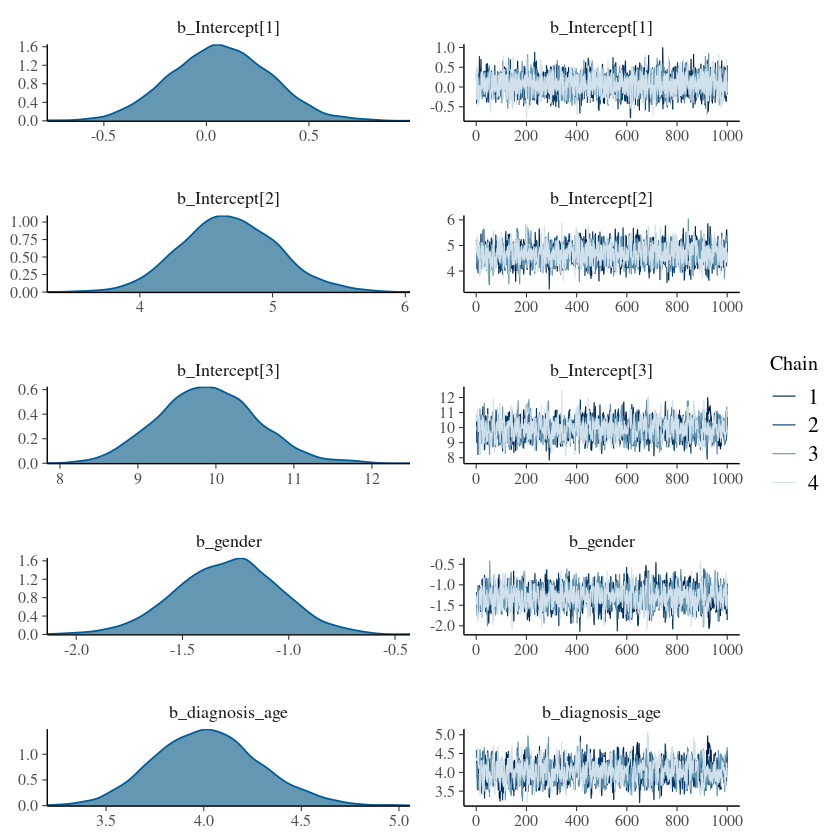

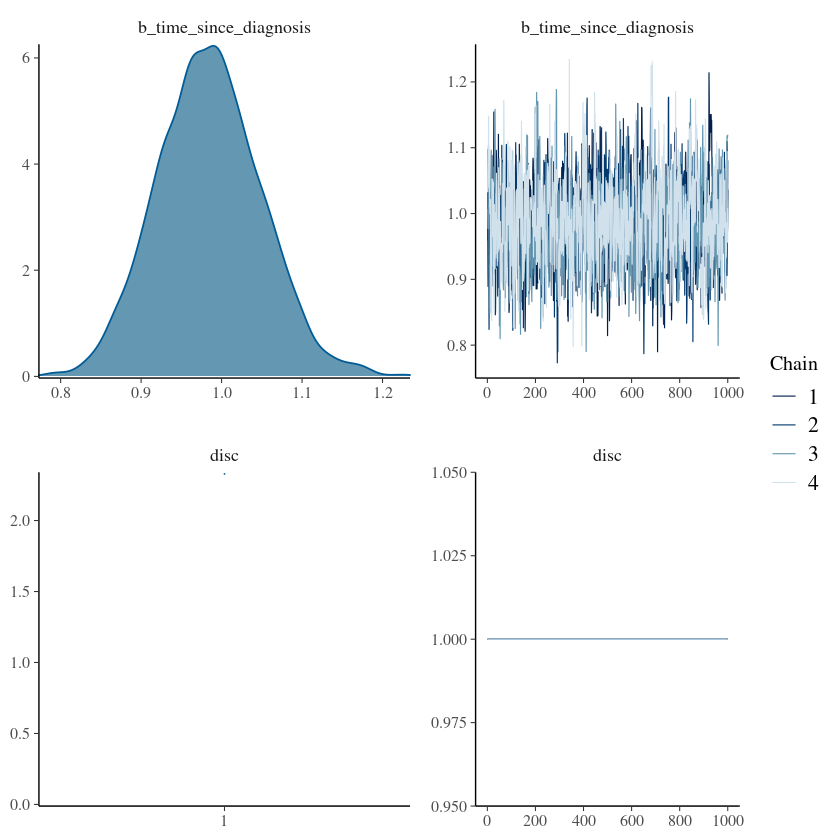

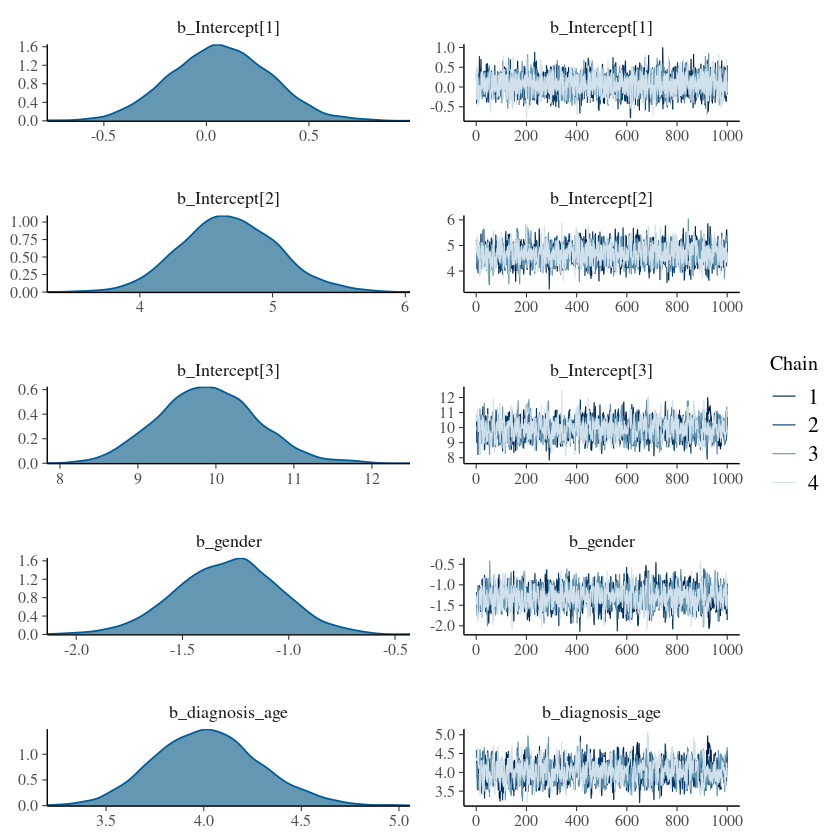

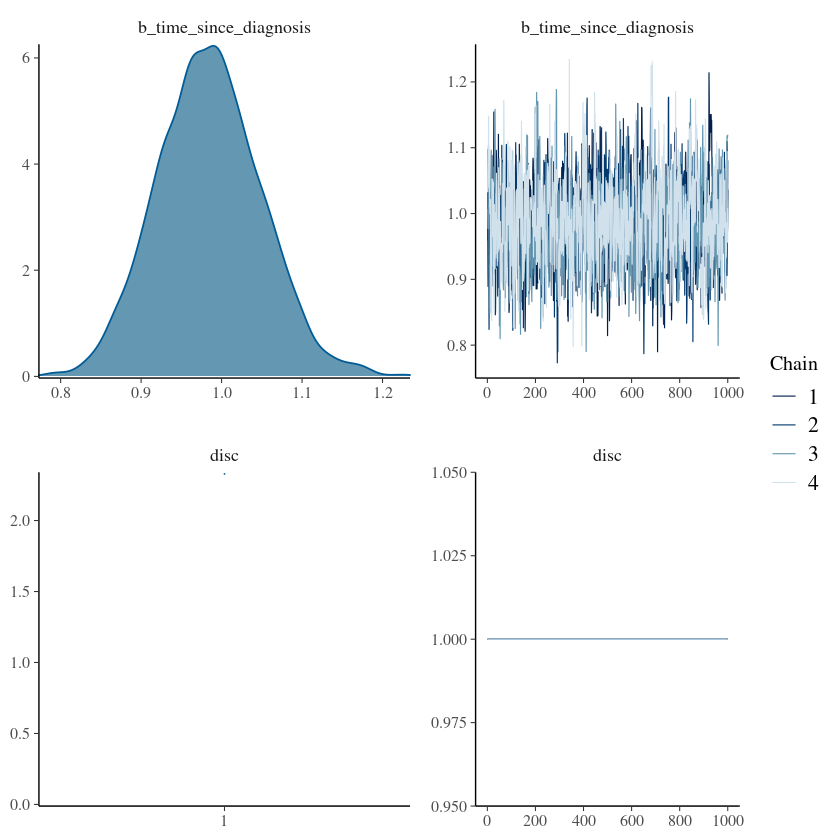

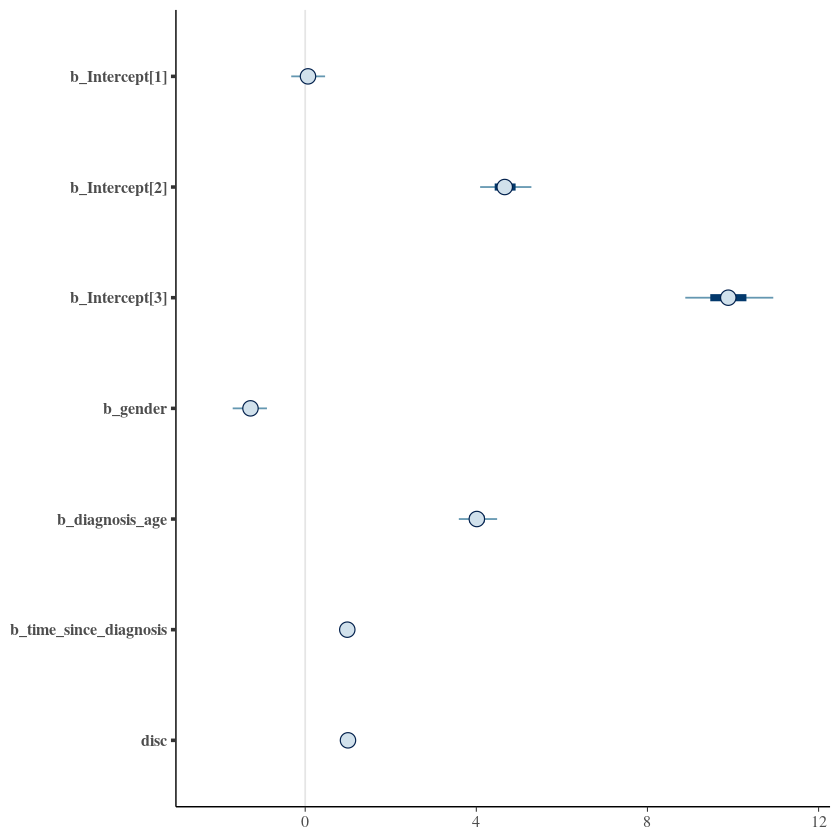

[[1]]
[[1]][[1]]

[[1]][[2]]


[[2]]

[[3]]

[[4]]
    Estimate  Est.Error      Q2.5     Q97.5
R2 0.8222713 0.00493065 0.8116263 0.8306107

[[5]]


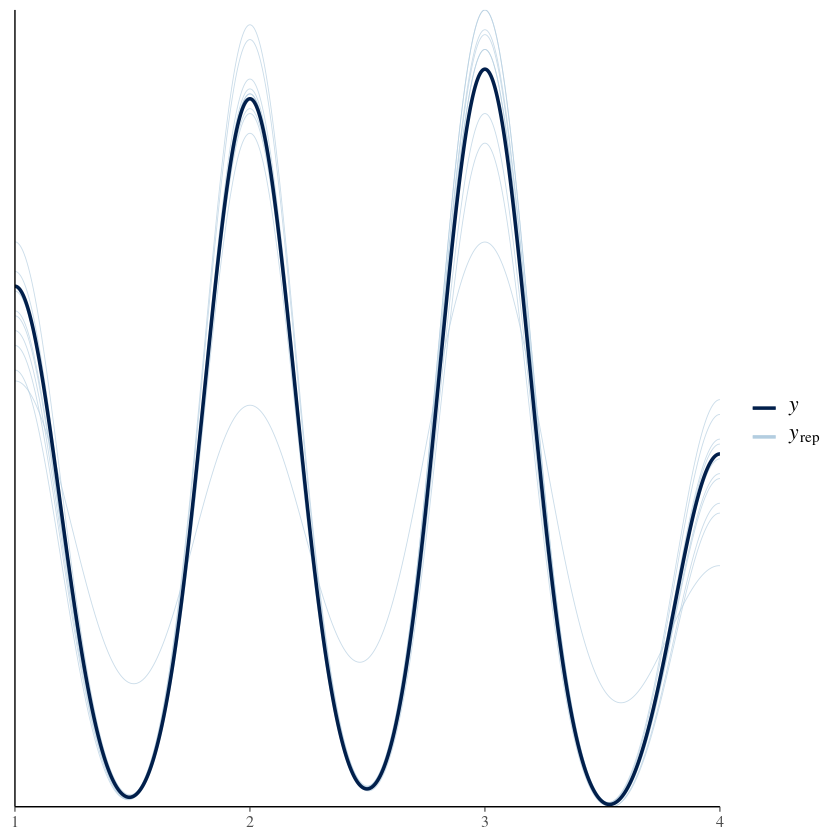

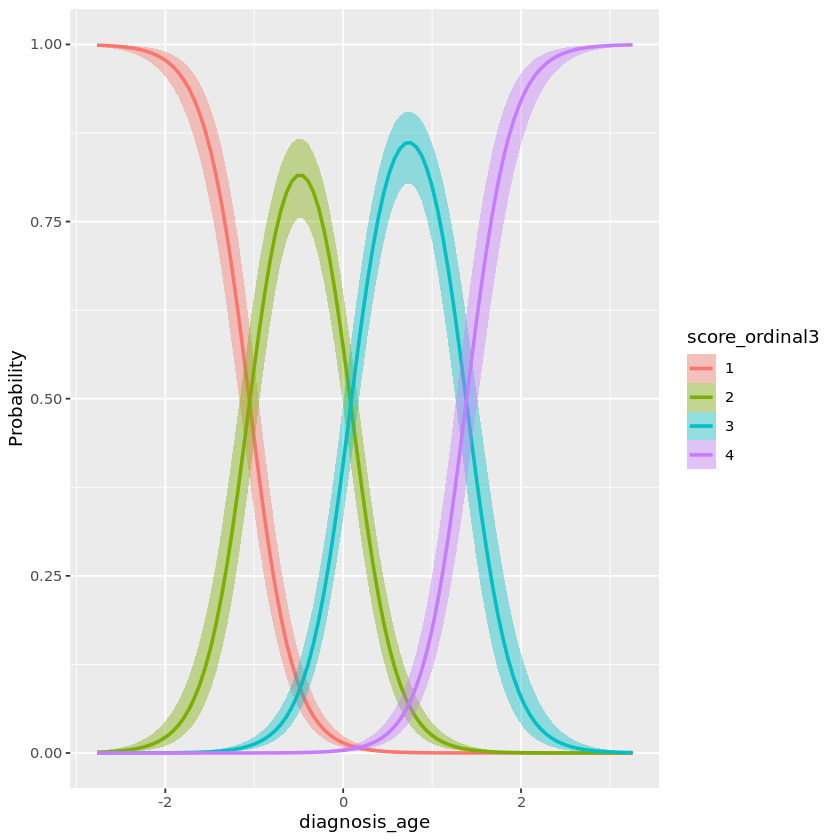

In [65]:
inspect_results(ordreg_cum)

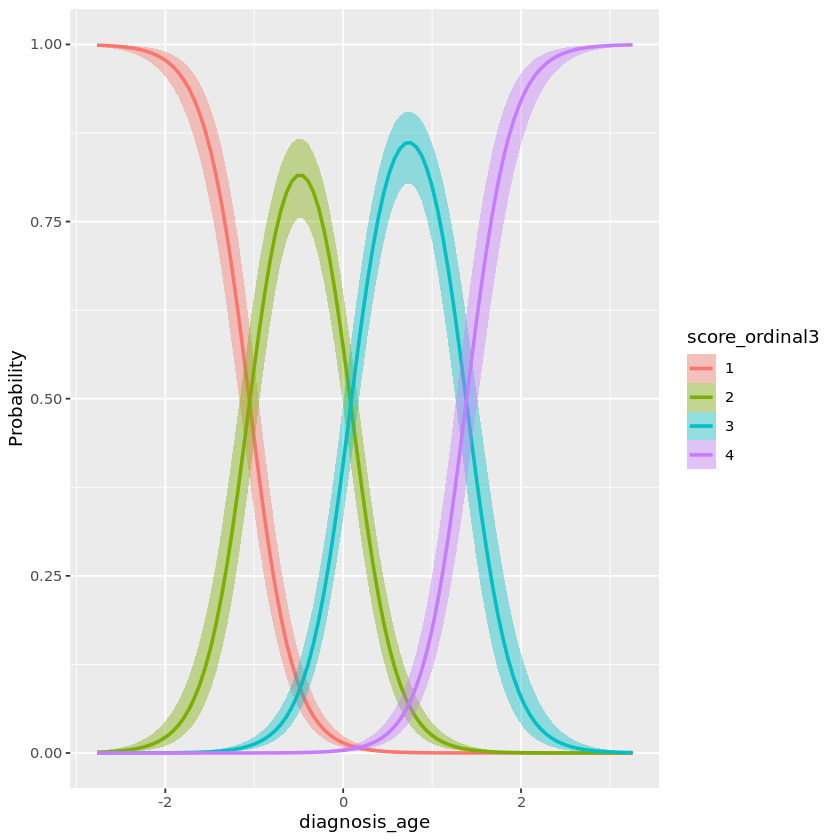

In [56]:
conditional_effects(ordreg_cum, "diagnosis_age", categorical = TRUE)

In [49]:
save_model_fix(ordreg_acat,'models/ordreg_acat/')

## Toy models mixed and ordinal

In [44]:
# load data
toy_data <- read.csv(file = '/scratch/c.c21013066/data/tutorial/brms/data/toy_data_ordinalreg_mixed.csv')

In [45]:
glimpse(toy_data)

Rows: 500
Columns: 8
$ participant          <chr> "sub_100", "sub_100", "sub_100", "sub_100", "sub_…
$ time_since_diagnosis <dbl> 0.0, 2.5, 5.0, 7.5, 10.0, 0.0, 2.5, 5.0, 7.5, 10.…
$ diagnosis_age        <dbl> 0.58832688, 0.58832688, 0.58832688, 0.58832688, 0…
$ gender               <int> 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0…
$ score_ordinal3       <int> 2, 3, 4, 4, 4, 1, 2, 2, 3, 3, 1, 1, 2, 2, 3, 2, 3…
$ score_ordinal5       <int> 2, 4, 6, 6, 6, 2, 3, 4, 6, 6, 4, 4, 5, 6, 6, 1, 1…
$ subtype              <int> 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0…
$ diagnosis_age_group  <int> 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 2, 2…


In [46]:
ordregmixed_cum <- brm(score_ordinal3 ~ 1 + gender + diagnosis_age + time_since_diagnosis + (1+time_since_diagnosis|subtype), data=toy_data, family=cumulative("logit"))

Compiling Stan program...

Start sampling




SAMPLING FOR MODEL '66a59eaa973dda1a4fec716316a2597f' NOW (CHAIN 1).
Chain 1: 
Chain 1: Gradient evaluation took 0 seconds
Chain 1: 1000 transitions using 10 leapfrog steps per transition would take 0 seconds.
Chain 1: Adjust your expectations accordingly!
Chain 1: 
Chain 1: 
Chain 1: Iteration:    1 / 2000 [  0%]  (Warmup)
Chain 1: Iteration:  200 / 2000 [ 10%]  (Warmup)
Chain 1: Iteration:  400 / 2000 [ 20%]  (Warmup)
Chain 1: Iteration:  600 / 2000 [ 30%]  (Warmup)
Chain 1: Iteration:  800 / 2000 [ 40%]  (Warmup)
Chain 1: Iteration: 1000 / 2000 [ 50%]  (Warmup)
Chain 1: Iteration: 1001 / 2000 [ 50%]  (Sampling)
Chain 1: Iteration: 1200 / 2000 [ 60%]  (Sampling)
Chain 1: Iteration: 1400 / 2000 [ 70%]  (Sampling)
Chain 1: Iteration: 1600 / 2000 [ 80%]  (Sampling)
Chain 1: Iteration: 1800 / 2000 [ 90%]  (Sampling)
Chain 1: Iteration: 2000 / 2000 [100%]  (Sampling)
Chain 1: 
Chain 1:  Elapsed Time: 88.77 seconds (Warm-up)
Chain 1:                72.9 seconds (Sampling)
Chain 1:        

Warning message:
“There were 43 divergent transitions after warmup. See
https://mc-stan.org/misc/warnings.html#divergent-transitions-after-warmup
to find out why this is a problem and how to eliminate them.”
Warning message:
“Examine the pairs() plot to diagnose sampling problems
”


In [57]:
ordregmixed_seq <- brm(score_ordinal3 ~ 1 + gender + diagnosis_age + time_since_diagnosis + (1+time_since_diagnosis|subtype), data=toy_data, family=sratio("logit"))

Compiling Stan program...

Start sampling




SAMPLING FOR MODEL 'cb42719c6a10bf1c25a7caadafede403' NOW (CHAIN 1).
Chain 1: 
Chain 1: Gradient evaluation took 0 seconds
Chain 1: 1000 transitions using 10 leapfrog steps per transition would take 0 seconds.
Chain 1: Adjust your expectations accordingly!
Chain 1: 
Chain 1: 
Chain 1: Iteration:    1 / 2000 [  0%]  (Warmup)
Chain 1: Iteration:  200 / 2000 [ 10%]  (Warmup)
Chain 1: Iteration:  400 / 2000 [ 20%]  (Warmup)
Chain 1: Iteration:  600 / 2000 [ 30%]  (Warmup)
Chain 1: Iteration:  800 / 2000 [ 40%]  (Warmup)
Chain 1: Iteration: 1000 / 2000 [ 50%]  (Warmup)
Chain 1: Iteration: 1001 / 2000 [ 50%]  (Sampling)
Chain 1: Iteration: 1200 / 2000 [ 60%]  (Sampling)
Chain 1: Iteration: 1400 / 2000 [ 70%]  (Sampling)
Chain 1: Iteration: 1600 / 2000 [ 80%]  (Sampling)
Chain 1: Iteration: 1800 / 2000 [ 90%]  (Sampling)
Chain 1: Iteration: 2000 / 2000 [100%]  (Sampling)
Chain 1: 
Chain 1:  Elapsed Time: 78.19 seconds (Warm-up)
Chain 1:                73.63 seconds (Sampling)
Chain 1:       

Warning message:
“There were 94 divergent transitions after warmup. See
https://mc-stan.org/misc/warnings.html#divergent-transitions-after-warmup
to find out why this is a problem and how to eliminate them.”
Warning message:
“Examine the pairs() plot to diagnose sampling problems
”


In [58]:
ordregmixed_acat <- brm(score_ordinal3 ~ 1 + gender + diagnosis_age + time_since_diagnosis + (1+time_since_diagnosis|subtype), data=toy_data, family=acat("logit"))

Compiling Stan program...

Start sampling




SAMPLING FOR MODEL '45485cd7fa9f6785f859b0e77e9dd211' NOW (CHAIN 1).
Chain 1: 
Chain 1: Gradient evaluation took 0 seconds
Chain 1: 1000 transitions using 10 leapfrog steps per transition would take 0 seconds.
Chain 1: Adjust your expectations accordingly!
Chain 1: 
Chain 1: 
Chain 1: Iteration:    1 / 2000 [  0%]  (Warmup)
Chain 1: Iteration:  200 / 2000 [ 10%]  (Warmup)
Chain 1: Iteration:  400 / 2000 [ 20%]  (Warmup)
Chain 1: Iteration:  600 / 2000 [ 30%]  (Warmup)
Chain 1: Iteration:  800 / 2000 [ 40%]  (Warmup)
Chain 1: Iteration: 1000 / 2000 [ 50%]  (Warmup)
Chain 1: Iteration: 1001 / 2000 [ 50%]  (Sampling)
Chain 1: Iteration: 1200 / 2000 [ 60%]  (Sampling)
Chain 1: Iteration: 1400 / 2000 [ 70%]  (Sampling)
Chain 1: Iteration: 1600 / 2000 [ 80%]  (Sampling)
Chain 1: Iteration: 1800 / 2000 [ 90%]  (Sampling)
Chain 1: Iteration: 2000 / 2000 [100%]  (Sampling)
Chain 1: 
Chain 1:  Elapsed Time: 86.85 seconds (Warm-up)
Chain 1:                67.24 seconds (Sampling)
Chain 1:       

Warning message:
“There were 102 divergent transitions after warmup. See
https://mc-stan.org/misc/warnings.html#divergent-transitions-after-warmup
to find out why this is a problem and how to eliminate them.”
Warning message:
“Examine the pairs() plot to diagnose sampling problems
”


In [69]:
save_model_fix(ordregmixed_cum,'models/ordregmixed_cum/')
save_model_fix(ordregmixed_seq,'models/ordregmixed_seq/')
save_model_fix(ordregmixed_acat,'models/ordregmixed_acat/')

In [70]:
fixef(ordregmixed_acat)

,Estimate,Est.Error,Q2.5,Q97.5
Intercept[1],-0.1077708,0.5378379,-1.2256501,0.8937696
Intercept[2],4.8696014,0.6819430,3.4510088,6.1669370
Intercept[3],10.3698340,1.0009202,8.3163230,12.3007043
gender,-1.2236786,0.2878847,-1.8137808,-0.6779357
diagnosis_age,4.0500282,0.3476249,3.4118165,4.7328289
time_since_diagnosis,1.0257124,0.4619091,0.1377514,2.0292349


In [74]:
summary(ordregmixed_acat)

Warning message:
“There were 102 divergent transitions after warmup. Increasing adapt_delta above 0.8 may help. See http://mc-stan.org/misc/warnings.html#divergent-transitions-after-warmup”


 Family: acat 
  Links: mu = logit; disc = identity 
Formula: score_ordinal3 ~ 1 + gender + diagnosis_age + time_since_diagnosis + (1 + time_since_diagnosis | subtype) 
   Data: toy_data (Number of observations: 500) 
  Draws: 4 chains, each with iter = 2000; warmup = 1000; thin = 1;
         total post-warmup draws = 4000

Group-Level Effects: 
~subtype (Number of levels: 3) 
                                    Estimate Est.Error l-95% CI u-95% CI Rhat
sd(Intercept)                           0.71      0.70     0.02     2.68 1.00
sd(time_since_diagnosis)                1.84      0.80     0.82     3.90 1.01
cor(Intercept,time_since_diagnosis)    -0.27      0.55    -0.97     0.86 1.00
                                    Bulk_ESS Tail_ESS
sd(Intercept)                           1246     1462
sd(time_since_diagnosis)                1165     1325
cor(Intercept,time_since_diagnosis)      943     1247

Population-Level Effects: 
                     Estimate Est.Error l-95% CI u-95% CI Rhat B

In [76]:
ranef(ordregmixed_acat)$subtype

, , Intercept

    Estimate Est.Error       Q2.5     Q97.5
0 -0.1225886 0.5042986 -1.3073633 0.7971910
1 -0.1221965 0.5216775 -1.2649991 0.8677345
2  0.3374974 0.6193760 -0.7789687 1.7713863

, , time_since_diagnosis

      Estimate Est.Error        Q2.5      Q97.5
0  0.003033255 0.4551396 -0.99271449  0.8636067
1  1.022992908 0.4664195  0.03945817  1.9129069
2 -1.992131591 0.4955357 -3.01931624 -1.0621781